Hello there!

*Autoencoders* (AE) are neural networks which are trained to learn a compressed representation of the inputs they are fed. For instance, they can be employed for compressing images... although they are no match for specific algorithms such as JPEG. I employed them successfully in the past for anomaly detection in real-time signal processing. 

AE have a symmetric hour-glass shape. The two symmetric parts are known as the **encoder** and than **decoder**, respectively (..oh really?). The encoder takes the original inputs and compress them into **codes**. The decoder tries to reconstruct the original inputs from these codes. AE are trained by minimizing a *reconstruction error*, i.e. some measure of the difference between the original patterns and the reconstructed ones.

In this notebook I will show you how **the dimensionality reduction performed by a simple AE (made using Keras) is more interesting than that of PCA or ICA**, at least for visualization purposes. In particular, I will be comparing the codes of an AE with 1 hidden layer of 2 neurons (yeah... that corresponds to a massive compression, over 150x) against the first 2 principal components of the Mercedes dataset many of you are already familiar with.

It won't take long, so bear with me for a while and upvote this notebook if you liked it. If you are interested in Autoencoders I strongly suggest you to have a look at [this Keras blog][1]. 


  [1]: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
# import base modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load training data
print('Load data...')
df_train = pd.read_csv('../input/train.csv')

Load data...


In [3]:
# let's keep just the boolean features
train = df_train.iloc[:,10:]
# ... and the y
y = df_train.y

In [4]:
# Let's quickly build an Autoencoder with 1 hidden layer and only 2 hidden neurons. 
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 2
input_layer = Input(shape=(train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(train.shape[1], activation='sigmoid')(encoded)

# let's create and compile the autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Using TensorFlow backend.


In [5]:
# let's train the autoencoder, checking the progress on a validation dataset 
from sklearn.model_selection import train_test_split
X1, X2, Y1, Y2 = train_test_split(train, train, test_size=0.2, random_state=42)

# these parameters seems to work for the Mercedes dataset
autoencoder.fit(X1.values, Y1.values,
                epochs=300,
                batch_size=200,
                shuffle=False,
                verbose = 2,
                validation_data=(X2.values, Y2.values))

Train on 3367 samples, validate on 842 samples
Epoch 1/300
0s - loss: 0.6862 - val_loss: 0.6740
Epoch 2/300
0s - loss: 0.6534 - val_loss: 0.6232
Epoch 3/300
0s - loss: 0.5861 - val_loss: 0.5393
Epoch 4/300
0s - loss: 0.4937 - val_loss: 0.4426
Epoch 5/300
0s - loss: 0.4008 - val_loss: 0.3586
Epoch 6/300
0s - loss: 0.3279 - val_loss: 0.2997
Epoch 7/300
0s - loss: 0.2800 - val_loss: 0.2636
Epoch 8/300
0s - loss: 0.2515 - val_loss: 0.2426
Epoch 9/300
0s - loss: 0.2349 - val_loss: 0.2304
Epoch 10/300
0s - loss: 0.2249 - val_loss: 0.2229
Epoch 11/300
0s - loss: 0.2187 - val_loss: 0.2180
Epoch 12/300
0s - loss: 0.2145 - val_loss: 0.2146
Epoch 13/300
0s - loss: 0.2115 - val_loss: 0.2122
Epoch 14/300
0s - loss: 0.2092 - val_loss: 0.2103
Epoch 15/300
0s - loss: 0.2074 - val_loss: 0.2088
Epoch 16/300
0s - loss: 0.2060 - val_loss: 0.2076
Epoch 17/300
0s - loss: 0.2048 - val_loss: 0.2065
Epoch 18/300
0s - loss: 0.2037 - val_loss: 0.2055
Epoch 19/300
0s - loss: 0.2028 - val_loss: 0.2047
Epoch 20/300

In [6]:
# now let's evaluate the coding of the initial features
encoder = Model(input_layer, encoded)
preds = encoder.predict(train.values)

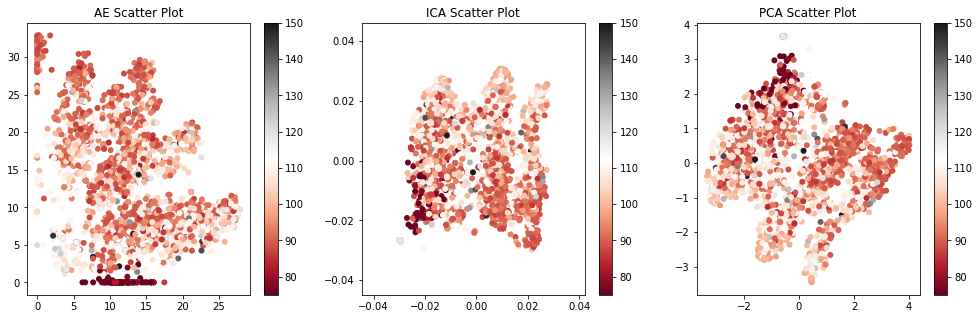

In [7]:
#... and let's plot the two components of the compression on a scatter plot that also shows 
# the y value associated to each point. PCA decomposition is provided as well for comparison
plt.figure(figsize = (17,5))
plt.subplot(131)
plt.scatter(preds[:,0],preds[:,1],  c = y, cmap = "RdGy", 
            edgecolor = "None", alpha=1, vmin = 75, vmax = 150)
plt.colorbar()
plt.title('AE Scatter Plot')


# ICA and PCA (first 2 components)
from sklearn.decomposition import PCA, FastICA # Principal Component Analysis module
ica = FastICA(n_components=2)
ica_2d = ica.fit_transform(train.values)

plt.subplot(132)
plt.scatter(ica_2d[:,0],ica_2d[:,1],  c = y, cmap = "RdGy",
            edgecolor = "None", alpha=1, vmin = 75, vmax = 150)
plt.colorbar()
plt.title('ICA Scatter Plot')

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(train.values)

plt.subplot(133)
plt.scatter(pca_2d[:,0],pca_2d[:,1],  c = y, cmap = "RdGy",
            edgecolor = "None", alpha=1, vmin = 75, vmax = 150)
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.show()

### Can you see how the cluster with very low y is clearer when considering the AE compressed representation? In the same way, the AE representation helps identify at least another cluster with low-to-medium y.

### Btw, that cluster is easily easily identified by variable X232... but I think many of you already know this. If not, see below...

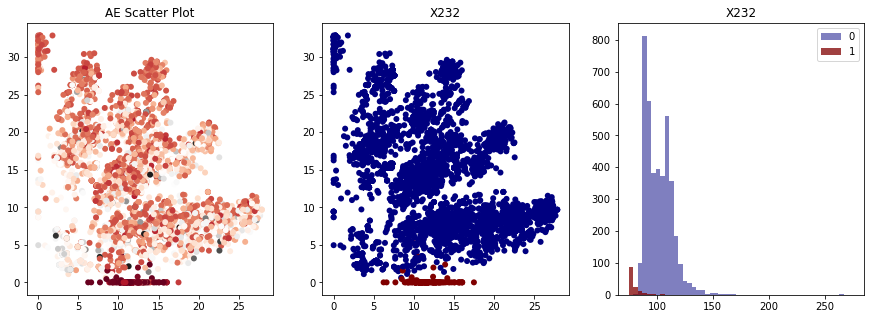

In [8]:
var = df_train.X232
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.scatter(preds[:,0],preds[:,1],  c = y, cmap = "RdGy", 
            edgecolor = "None", alpha=1, vmin = 75, vmax = 150)
plt.title('AE Scatter Plot')

plt.subplot(132)
plt.scatter(preds[:,0],preds[:,1],  c = var, cmap = "jet", 
            edgecolor = "None", alpha=1, vmin = 0, vmax = 1)
plt.title('X232')

plt.subplot(133)
bins = np.linspace(75, 275, 51)
plt.hist(y[var==0], bins, alpha=0.5, label='0', color = plt.cm.jet(0))
plt.hist(y[var==1], bins, alpha=0.75, label='1', color = plt.cm.jet(255))
plt.title('X232')
plt.legend(loc='upper right')

plt.show()